In [1]:
## testing of the linear regression application to the wnet

import torch
import sak
import pickle
import cv2
import sak.torch.image.data
import pydicom
import src.load_data
import matplotlib.pyplot as plt
import torch.nn as nn

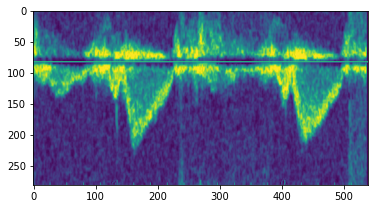

In [5]:
data = 'C:\\Users\\hp240\\Documents\\IAGO\\EBM\\TFG\\ALL_DOPPLER\\1.2.840.113619.2.98.10037.1583915399.0.158'

dicom = pydicom.dcmread(data)

x0,x1,y0,y1,xref,yref,deltax,deltay,unitsx,unitsy = src.load_data.get_frame(dicom,"doppler")

x = dicom.pixel_array.copy()[y0:y1,x0:x1,]
if dicom.get("PhotometricInterpretation", "RGB") in ['YBR_FULL', 'YBR_FULL_422']:
    x = src.load_data.convert_ybr_to_rgb(x)
x = x[...,0] # to grayscale

plt.imshow(x)

(256, 512)


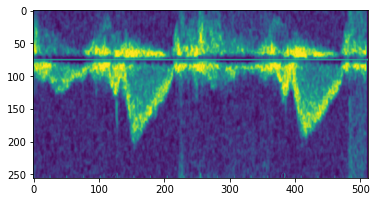

In [4]:
# hay que interpolar, es decir recortar el eje x para que al hacer reshape no se distorsione
shape = (256,512)
# quiero que sea 256x512
proporcion = shape[1] / shape[0]
x_side = x.shape[0]*2

# cropping:
x = x[:,0:x_side]
x = cv2.resize(x,(512,256))[None,]
x = x.squeeze()

print(x.shape)

plt.imshow(x)


In [3]:
m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)
print(output.size())

torch.Size([128, 30])
